<a href="https://colab.research.google.com/github/arshpreet10/LPMNOIDA11JUNE/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
X= digits.data
X.shape

(1797, 64)

In [11]:
y= digits.target
y.shape

(1797,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
def manhattan(d1, d2):
  return sum(abs(d1-d2))

In [15]:
a = np.array([5,3,4])
b = np.array([4,4,2])
manhattan(a,b)

4

In [16]:
from collections import Counter

In [38]:
def knn(X_train, y_train, X_test, k):
  y_pred = []
  X_train= X_train.tolist()
  for data in X_test:
    distances = [(manhattan(data,x), X_train.index(x)) for x in X_train]
    distances.sort()
    k_nearest = distances[:k]
    neighbours = [y_train[d[1]] for d in k_nearest]
    c=Counter(neighbours)
    y_pred.append(c.most_common()[0][0])
  return y_pred

In [18]:
y_pred = knn(X_train, y_train, X_test, 5)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.9805555555555555

In [21]:
acc_scores = []
for k in range(1,25,2):
  y_pred = knn(X_train, y_train, X_test, k)
  accuracy = accuracy_score(y_test,y_pred)
  acc_scores.append((k,accuracy))

In [30]:
acc_scores

[(1, 0.9805555555555555),
 (3, 0.9805555555555555),
 (5, 0.9805555555555555),
 (7, 0.9777777777777777),
 (9, 0.9722222222222222),
 (11, 0.975),
 (13, 0.9722222222222222),
 (15, 0.975),
 (17, 0.9666666666666667),
 (19, 0.9722222222222222),
 (21, 0.9694444444444444),
 (23, 0.9666666666666667)]

In [22]:
import matplotlib.pyplot as plt

In [26]:
acc_scores[1]
kv = [x[0] for x in acc_scores]
acc = [x[1] for x in acc_scores]

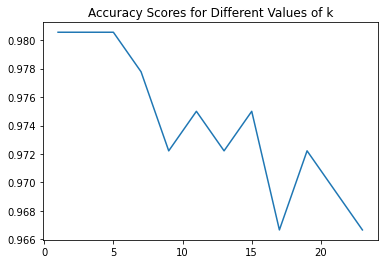

In [29]:
plt.plot(kv,acc)
plt.title('Accuracy Scores for Different Values of k')
plt.show()

In [31]:
y_pred = knn(X_train, y_train, X_test, 3)

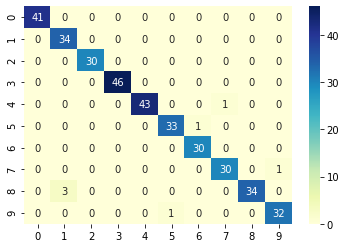

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu")
plt.show()